In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [128]:
df = pd.read_excel("Cellphone.xlsx")
df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [129]:
df.isnull().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

In [130]:
df[df.duplicated()]

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness


In [131]:
df.drop(columns= 'Product_id',inplace=True,axis=1)

In [132]:
#data prepocesing
df.describe()

,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


In [133]:
df.shape

(161, 13)

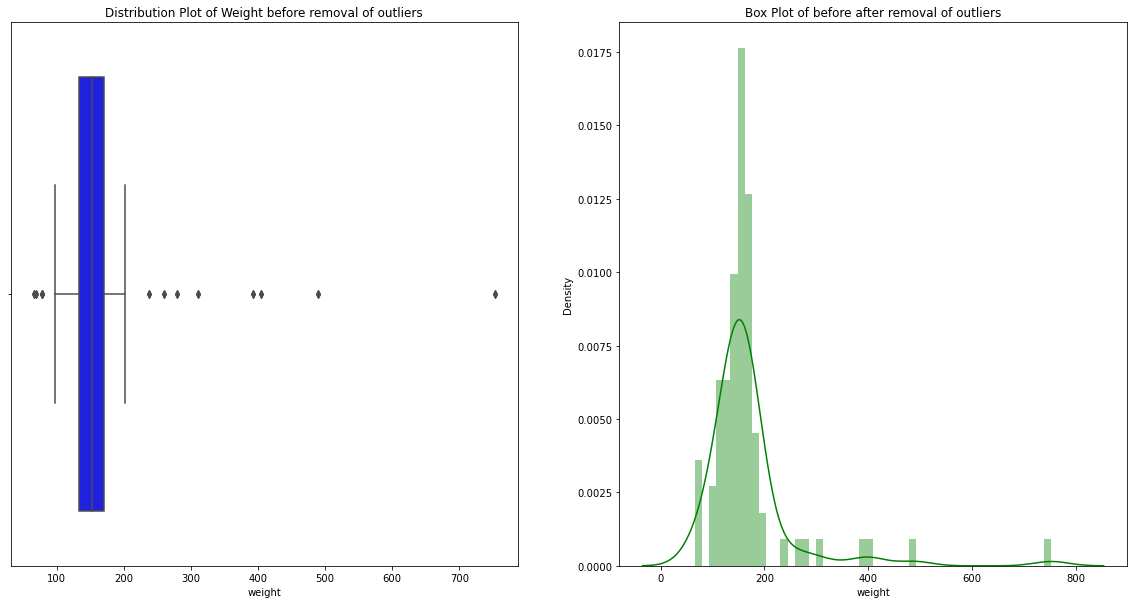

In [134]:
#menghapus outlier
fig, ax = plt.subplots(1,2, figsize = (20,10))
sns.boxplot(df['weight'], ax = ax[0], color = 'b')
sns.distplot(df['weight'], ax = ax[1], color = 'g')
ax[0].set_title('Distribution Plot of Weight before removal of outliers')
ax[1].set_title('Box Plot of before after removal of outliers')
plt.show()

In [135]:
#dengan quantile
upper_limit = df['weight'].quantile(.99)
lower_limit = df['weight'].quantile(.01)
df = df[(df['weight'] < upper_limit) & (df['weight'] > lower_limit)]
df.head(3)

,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,2357,10,135.0,5.2,424,8,1.35,16.0,3.0,13.00,8.0,2610,7.4
1,1749,10,125.0,4.0,233,2,1.30,4.0,1.0,3.15,0.0,1700,9.9
2,1916,10,110.0,4.7,312,4,1.20,8.0,1.5,13.00,5.0,2000,7.6


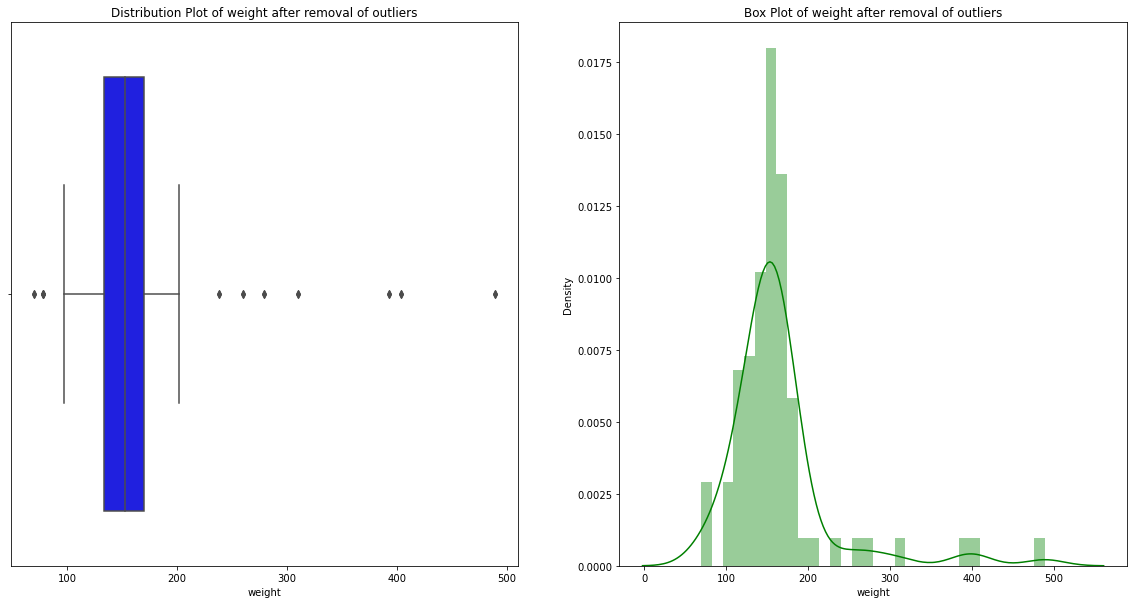

In [136]:
fig, ax = plt.subplots(1,2, figsize = (20,10))
sns.boxplot(df['weight'], ax = ax[0], color = 'b')
sns.distplot(df['weight'], ax = ax[1], color = 'g')
ax[0].set_title('Distribution Plot of weight after removal of outliers')
ax[1].set_title('Box Plot of weight after removal of outliers')
plt.show()

nilai outlier pada thikness

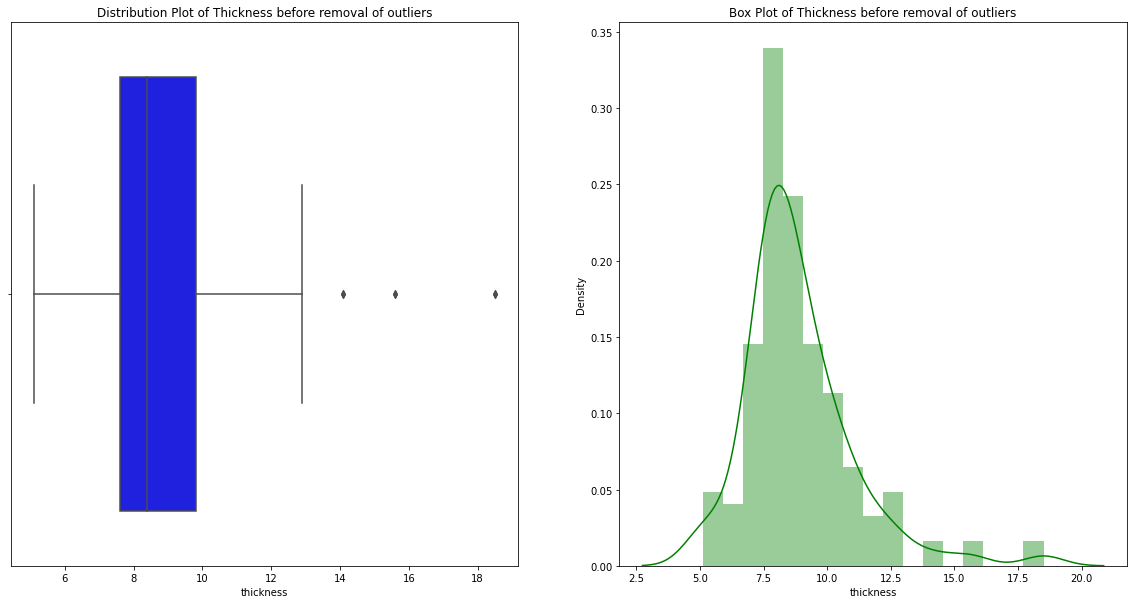

In [137]:
fig, ax = plt.subplots(1,2, figsize = (20,10))
sns.boxplot(df['thickness'], ax = ax[0], color = 'b')
sns.distplot(df['thickness'], ax = ax[1], color = 'g')
ax[0].set_title('Distribution Plot of Thickness before removal of outliers')
ax[1].set_title('Box Plot of Thickness before removal of outliers')
plt.show()

In [138]:
#dengan quantile
upper_limit = df['thickness'].quantile(.99)
lower_limit = df['thickness'].quantile(.01)
df = df[(df['thickness'] < upper_limit) & (df['thickness'] > lower_limit)]
df.head(3)

,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,2357,10,135.0,5.2,424,8,1.35,16.0,3.0,13.00,8.0,2610,7.4
1,1749,10,125.0,4.0,233,2,1.30,4.0,1.0,3.15,0.0,1700,9.9
2,1916,10,110.0,4.7,312,4,1.20,8.0,1.5,13.00,5.0,2000,7.6


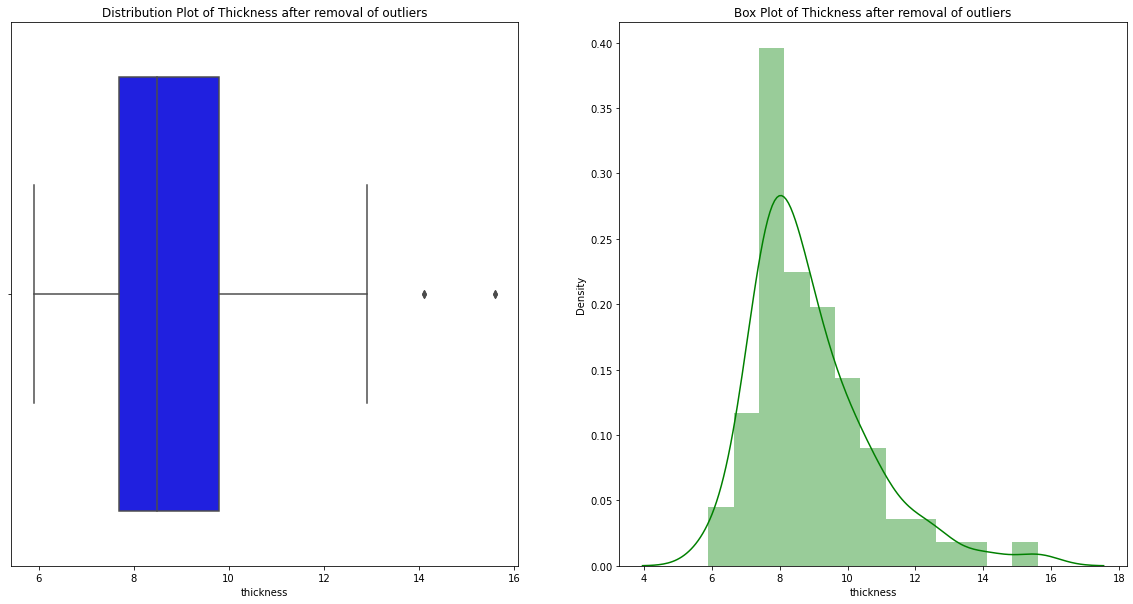

In [139]:
fig, ax = plt.subplots(1,2, figsize = (20,10))
sns.boxplot(df['thickness'], ax = ax[0], color = 'b')
sns.distplot(df['thickness'], ax = ax[1], color = 'g')
ax[0].set_title('Distribution Plot of Thickness after removal of outliers')
ax[1].set_title('Box Plot of Thickness after removal of outliers')
plt.show()

### model Regression

In [140]:
X = df.drop('Price',axis=1)
y = df['Price']

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [142]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=50)

In [147]:
print(X_train.shape)
print(X_test.shape)
print()
print(y_test.shape)
print(y_train.shape)

(119, 12)
(30, 12)

(30,)
(119,)


In [143]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [144]:
model.score(X_test,y_test)

0.9359278998726747

In [145]:
print(f'R2 score: {r2_score(y_test,pred)}')

R2 score: 0.9359278998726747
